In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv("C:/Users/Abhi/Desktop/CSV files/Diabetes.csv")

In [75]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [77]:
# Here it come to know that no missing values in the data columns.

<AxesSubplot:>

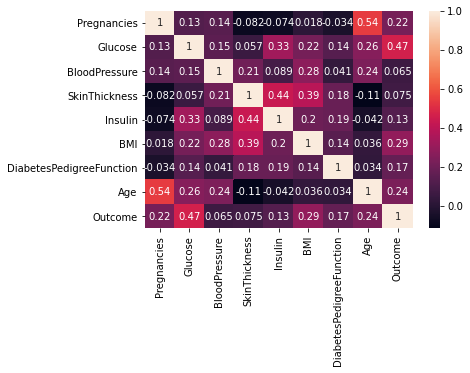

In [78]:
# To find the corelation among the variable we use HEATMAP
sns.heatmap(data.corr(), annot=True,)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

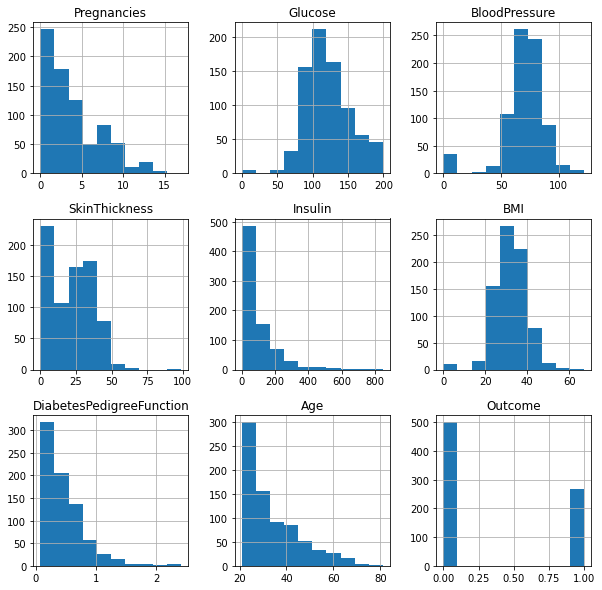

In [79]:
data.hist(figsize=(10,10))

In [80]:
# Initiating variables
X = data.drop(['Outcome'], axis=1)
y = data['Outcome'].values.reshape(-1,1)

In [81]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=20, random_state=20)


In [82]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
# Training our model using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

<ipython-input-83-6e42d676f623>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [84]:
# Testing our model
y_pred = classifier.predict(X_test)

In [85]:
# Making confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  4]
 [ 4  1]]


0.6

In [86]:
#Prediction for new values
output= classifier.predict([[6,148,72,35,0,33.6,0.627,50]])
output

array([1], dtype=int64)

# Logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model1 = LR.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

C:\Users\Abhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [89]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, prediction1)

[[11  4]
 [ 4  1]]


0.75

# Decision Tree 

In [90]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
model2 = DTC.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
CM2 = confusion_matrix(y_test, prediction2)
CM2

array([[12,  3],
       [ 4,  1]], dtype=int64)

In [91]:
accuracy_score(y_test,prediction2)

0.65

# KNN classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
model3 = KNN.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
CM3 = confusion_matrix(y_test, prediction3)
CM3


<ipython-input-92-929c552ff7d9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model3 = KNN.fit(X_train, y_train)


array([[13,  2],
       [ 4,  1]], dtype=int64)

In [93]:
accuracy_score(y_test,prediction3)

0.7

# Support Vector Machine

In [95]:
from sklearn.svm import SVC
SVM = SVC()
model4 = SVM.fit(X_train, y_train)
prediction4 = model4.predict(X_test)
CM4 = confusion_matrix(y_test, prediction4)
CM4

C:\Users\Abhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[12,  3],
       [ 3,  2]], dtype=int64)

In [96]:
accuracy_score(y_test, prediction4)

0.7

In [97]:
print("Accuaracy by Logistic Regression:", accuracy_score(y_test,prediction1))
print("Accuaracy by Decision Tree:", accuracy_score(y_test,prediction2))
print("Accuaracy by KNN:", accuracy_score(y_test,prediction3))
print("Accuaracy by SVM:", accuracy_score(y_test,prediction4))

Accuaracy by Logistic Regression: 0.75
Accuaracy by Decision Tree: 0.65
Accuaracy by KNN: 0.7
Accuaracy by SVM: 0.7


In [103]:

print("Enter the patient's information as given below:")
Pregnancies = int(input("Pregnancies :"))
Glucose = float(input("Glucose:"))
BloodPressure = float(input("BloodPressure:"))
SkinThickness = float(input("SkinThickness:"))
Insulin = float(input("Insulin:"))
BMI = float(input("BMI:"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction:"))
Age = float(input("Age:"))
output=classifier.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
]])
if output ==1:
    print("Patient is suffering from Diabetes")
else:
    print("Patient is not suffering from Diabetes")


Enter the patient's information as given below:
Pregnancies :2
Glucose:2
BloodPressure:2
SkinThickness:2
Insulin:2
BMI:2
DiabetesPedigreeFunction:2
Age:2
Patient is suffering from Diabetes
